# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)
style.use('fivethirtyeight')
#plt.xkcd()

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# other packages
from sklearn import preprocessing
from scipy.stats import lognorm

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
##############################
# H1N1 DATA SECTION
##############################
h1n1 = pd.read_csv('./data/h1n1_summary.csv')
hCols = ['Date', 'Country', 'Total Cases', 'Total Deaths']
h1n1.columns = hCols
h1n1US = h1n1[h1n1['Country'] == 'United States of America'].reset_index()
h1n1US = h1n1US.drop(['index'], axis=1)
h1n1US['Date'] = pd.to_datetime(h1n1US['Date'], format = '%Y-%m-%d')

# filter our pharmaceutical company stocks in relation to time period of H1N1
h1n1PharmStocks = pd.read_csv('./stocks_data/top_pharm.csv')
pCols = ['Index','Symbol','Company','Date','Open', 'High', 'Low', 'Close', 'Adj Close Price', 'Volume']
h1n1PharmStocks.columns = pCols
h1n1PharmStocks['Date'] = pd.to_datetime(h1n1PharmStocks['Date'])
h1n1PharmStocks = h1n1PharmStocks[(h1n1PharmStocks['Date'] >= '2009-03-02') & (h1n1PharmStocks['Date'] <= '2009-08-06')]
h1n1PharmStocks['Pct Change'] = h1n1PharmStocks['Adj Close Price'].pct_change()
h1n1PharmStocks.head()

# filter Dow Jones Index in relation to time period of H1N1
h1n1DJI = pd.read_csv('./stocks_data/DJI.csv')
h1n1DJI['Date'] = pd.to_datetime(h1n1DJI['Date'])
h1n1DJI = h1n1DJI[(h1n1DJI['Date'] >= '2009-03-02') & (h1n1DJI['Date'] <= '2009-08-06')]
h1n1DJI['Pct Change'] = h1n1DJI['Price'].pct_change()
h1n1DJI['Symbol'] = 'DOW'
h1n1DJI.head()

# filter Pharma companies to 2 years before for comparison of volatility during h1n1 (2years so we can see what economy was like before '08 financial crisis)
prevH1n1PharmStocks = pd.read_csv('./stocks_data/top_pharm.csv')
pCols = ['Index','Symbol','Company','Date','Open', 'High', 'Low', 'Close', 'Adj Close Price', 'Volume']
prevH1n1PharmStocks.columns = pCols
prevH1n1PharmStocks['Date'] = pd.to_datetime(prevH1n1PharmStocks['Date'])
prevH1n1PharmStocks = prevH1n1PharmStocks[(prevH1n1PharmStocks['Date'] >= '2007-03-02') & (prevH1n1PharmStocks['Date'] <= '2007-08-06')]
prevH1n1PharmStocks['Pct Change'] = prevH1n1PharmStocks['Adj Close Price'].pct_change()
prevH1n1PharmStocks.head()

# filter DJI stocks to 2 years before for comparison of volatility during h1n1 (2years so we can see what economy was like before '08 financial crisis)
prevH1n1DJI = pd.read_csv('./stocks_data/DJI.csv')
prevH1n1DJI['Date'] = pd.to_datetime(prevH1n1DJI['Date'])
prevH1n1DJI = prevH1n1DJI[(prevH1n1DJI['Date'] >= '2007-03-02') & (prevH1n1DJI['Date'] <= '2007-08-06')]
prevH1n1DJI['Pct Change'] = prevH1n1DJI['Price'].pct_change()
prevH1n1DJI['Symbol'] = 'DOW'
prevH1n1DJI.head()





,Date,Price,Pct Change,Symbol
3821,2007-03-02,12114.099609,NaN,DOW
3822,2007-03-05,12050.410156,-0.005257,DOW
3823,2007-03-06,12207.589844,0.013044,DOW
3824,2007-03-07,12192.450195,-0.001240,DOW
3825,2007-03-08,12260.700195,0.005598,DOW


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0.5, 1.0, 'Pharmacy stock Prices vs. H1N1 Cases')

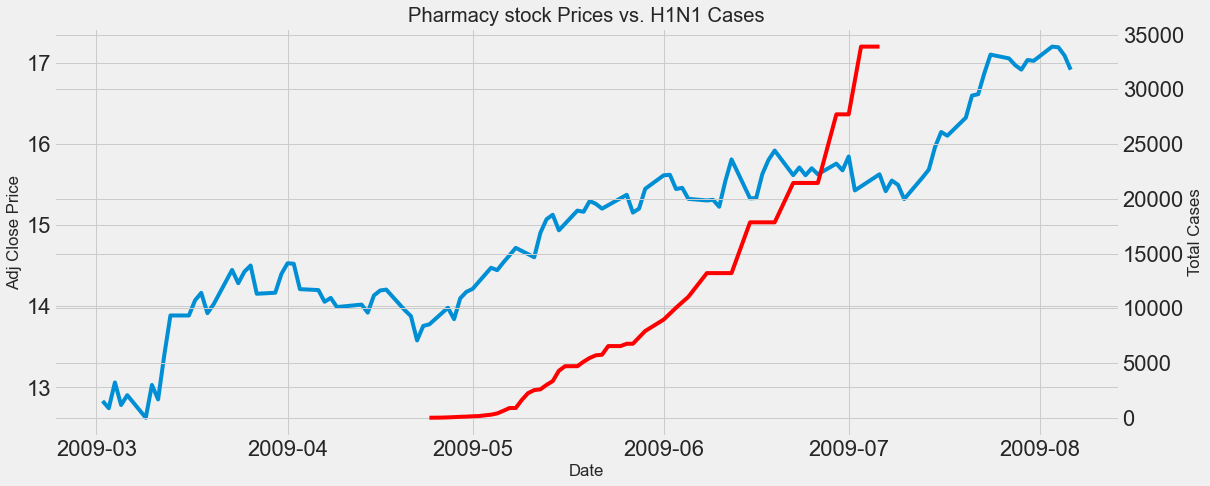

In [3]:
# Price of pharma companies stocks plotted with total h1n1 cases
numberOfCompanies = 10
h1n1PharmStocksSum = h1n1PharmStocks.groupby(['Date']).sum('Adj Close Price')/numberOfCompanies
ax = sns.lineplot(data = h1n1PharmStocksSum, x = 'Date', y = 'Adj Close Price')
sns.lineplot(data = h1n1US, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Pharmacy stock Prices vs. H1N1 Cases')

Text(0.5, 1.0, 'Dow Jones Stock Prices vs. H1N1 cases')

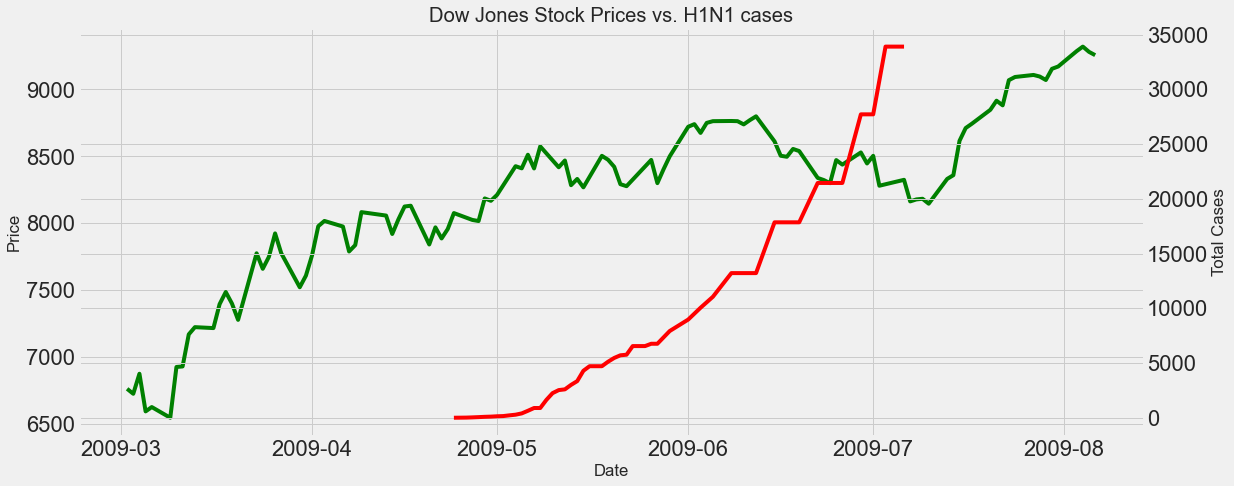

In [4]:
# general trend of Dow Jones prices plotted with h1n1 cases
ax = sns.lineplot(data = h1n1DJI, x = 'Date', y = 'Price', color = 'green')
sns.lineplot(data = h1n1US, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Dow Jones Stock Prices vs. H1N1 cases')

In [5]:
# normalize Dow Jones Index data to drop outliers for analysis
h1n1DJI = h1n1DJI.dropna()
h1n1DJI['NormPrice'] = preprocessing.normalize(np.array(h1n1DJI['Price']).reshape(1, -1)).reshape(-1, 1)
h1n1DJI['Norm Pct Change'] = h1n1DJI['Price'].pct_change()
h1n1DJI = h1n1DJI.dropna()
h1n1DJI

,Date,Price,Pct Change,Symbol,NormPrice,Norm Pct Change
4326,2009-03-04,6875.839844,0.022275,DOW,0.079433,0.022275
4327,2009-03-05,6594.439941,-0.040926,DOW,0.076183,-0.040926
4328,2009-03-06,6626.939941,0.004928,DOW,0.076558,0.004928
4329,2009-03-09,6547.049805,-0.012055,DOW,0.075635,-0.012055
4330,2009-03-10,6926.490234,0.057956,DOW,0.080019,0.057956
...,...,...,...,...,...,...
4430,2009-07-31,9171.610352,0.001873,DOW,0.105956,0.001873
4431,2009-08-03,9286.559570,0.012533,DOW,0.107283,0.012533
4432,2009-08-04,9320.190430,0.003621,DOW,0.107672,0.003621
4433,2009-08-05,9280.969727,-0.004208,DOW,0.107219,-0.004208


In [6]:
# normalizing Pharm stocks h1n1
h1n1PharmStocks = h1n1PharmStocks.dropna()
h1n1PharmStocks['Norm Adj Close Price'] = preprocessing.normalize(np.array(h1n1PharmStocks['Adj Close Price']).reshape(1, -1)).reshape(-1, 1)
h1n1PharmStocks['Norm Pct Change'] = h1n1PharmStocks['Adj Close Price'].pct_change()
h1n1PharmStocks = h1n1PharmStocks.dropna()
h1n1PharmStocks

,Index,Symbol,Company,Date,Open,High,Low,Close,Adj Close Price,Volume,Pct Change,Norm Adj Close Price,Norm Pct Change
5807,3982,AZN,AstraZeneca,2009-03-04,15.585000,15.770000,15.340000,15.540000,6.428839,3645400.0,-0.007980,0.010338,-0.007980
5808,3983,AZN,AstraZeneca,2009-03-05,15.570000,15.635000,15.130000,15.225000,6.298524,4150000.0,-0.020270,0.010128,-0.020270
5809,3984,AZN,AstraZeneca,2009-03-06,15.355000,15.485000,15.050000,15.325000,6.339893,4627000.0,0.006568,0.010195,0.006568
5810,3985,AZN,AstraZeneca,2009-03-09,15.035000,15.325000,14.980000,15.120000,6.255085,4082400.0,-0.013377,0.010058,-0.013377
5811,3986,AZN,AstraZeneca,2009-03-10,15.120000,15.765000,15.105000,15.710000,6.499166,3714400.0,0.039021,0.010451,0.039021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77826,1784,SNY,Sanofi,2009-07-31,32.730000,32.900002,32.349998,32.639999,21.572712,1355800.0,-0.006393,0.034689,-0.006393
77827,1785,SNY,Sanofi,2009-08-03,33.099998,33.810001,32.980000,33.750000,22.306343,2774200.0,0.034007,0.035869,0.034007
77828,1786,SNY,Sanofi,2009-08-04,33.869999,34.099998,33.779999,34.099998,22.537666,1948300.0,0.010370,0.036241,0.010370
77829,1787,SNY,Sanofi,2009-08-05,33.599998,33.630001,33.139999,33.349998,22.041971,920100.0,-0.021994,0.035443,-0.021994


In [7]:
# normalize Dow Jones Index 2 years before data to drop outliers for analysis
prevH1n1DJI = prevH1n1DJI.dropna()
prevH1n1DJI['Norm Price'] = preprocessing.normalize(np.array(prevH1n1DJI['Price']).reshape(1, -1)).reshape(-1, 1)
prevH1n1DJI['Norm Pct Change'] = prevH1n1DJI['Price'].pct_change()
prevH1n1DJI = prevH1n1DJI.dropna()
prevH1n1DJI

,Date,Price,Pct Change,Symbol,Norm Price,Norm Pct Change
3823,2007-03-06,12207.589844,0.013044,DOW,0.089303,0.013044
3824,2007-03-07,12192.450195,-0.001240,DOW,0.089192,-0.001240
3825,2007-03-08,12260.700195,0.005598,DOW,0.089691,0.005598
3826,2007-03-09,12276.320313,0.001274,DOW,0.089805,0.001274
3827,2007-03-12,12318.620117,0.003446,DOW,0.090115,0.003446
...,...,...,...,...,...,...
3925,2007-07-31,13211.990234,-0.010953,DOW,0.096650,-0.010953
3926,2007-08-01,13362.370117,0.011382,DOW,0.097750,0.011382
3927,2007-08-02,13463.330078,0.007556,DOW,0.098489,0.007556
3928,2007-08-03,13181.910156,-0.020903,DOW,0.096430,-0.020903


In [8]:
# normalize Pharma companies 2 years before data to drop outliers for analysis
prevH1n1PharmStocks = prevH1n1PharmStocks.dropna()
prevH1n1PharmStocks['Norm Adj Close Price'] = preprocessing.normalize(np.array(prevH1n1PharmStocks['Adj Close Price']).reshape(1, -1)).reshape(-1, 1)
prevH1n1PharmStocks['Norm Pct Change'] = prevH1n1PharmStocks['Adj Close Price'].pct_change()
prevH1n1PharmStocks = prevH1n1PharmStocks.dropna()
prevH1n1PharmStocks

,Index,Symbol,Company,Date,Open,High,Low,Close,Adj Close Price,Volume,Pct Change,Norm Adj Close Price,Norm Pct Change
5304,3479,AZN,AstraZeneca,2007-03-06,27.295000,27.514999,27.174999,27.465000,9.409238,1635800.0,0.026154,0.011866,0.026154
5305,3480,AZN,AstraZeneca,2007-03-07,27.565001,28.000000,27.530001,27.730000,9.500024,2615000.0,0.009649,0.011981,0.009649
5306,3481,AZN,AstraZeneca,2007-03-08,28.065001,28.219999,27.965000,28.065001,9.614791,1738600.0,0.012081,0.012125,0.012081
5307,3482,AZN,AstraZeneca,2007-03-09,28.455000,28.559999,28.219999,28.290001,9.691873,3733400.0,0.008017,0.012223,0.008017
5308,3483,AZN,AstraZeneca,2007-03-12,28.225000,28.410000,28.200001,28.325001,9.703864,2366000.0,0.001237,0.012238,0.001237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77321,1279,SNY,Sanofi,2007-07-31,42.070000,42.220001,41.599998,41.750000,25.152582,1282100.0,0.007967,0.031720,0.007967
77322,1280,SNY,Sanofi,2007-08-01,40.490002,40.959999,40.259998,40.930000,24.658571,2642600.0,-0.019641,0.031097,-0.019641
77323,1281,SNY,Sanofi,2007-08-02,41.240002,41.599998,41.150002,41.340000,24.905575,9491400.0,0.010017,0.031409,0.010017
77324,1282,SNY,Sanofi,2007-08-03,41.340000,41.490002,40.759998,40.810001,24.586273,3127800.0,-0.012820,0.031006,-0.012820


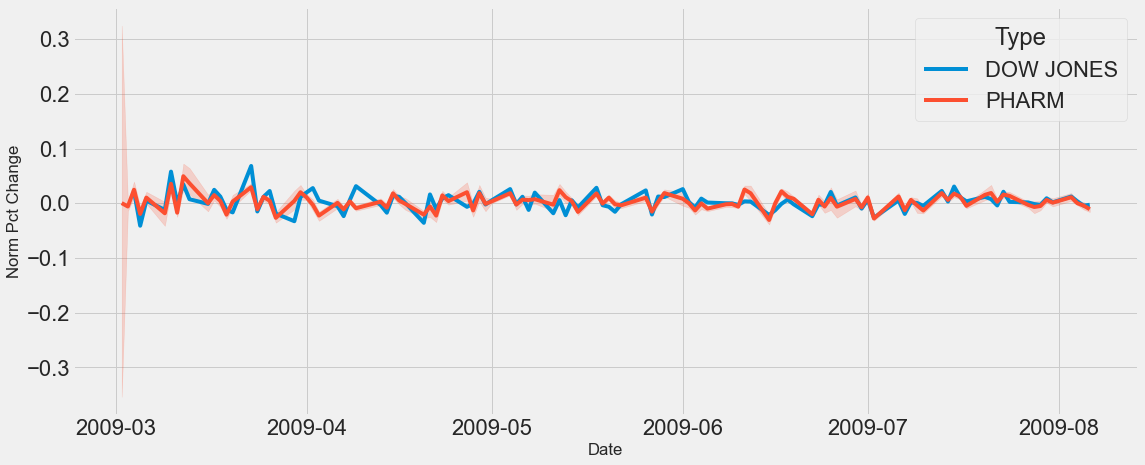

In [9]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and h1n1
h1n1PharmStocks['Type'] = 'PHARM'
h1n1DJI['Type'] = 'DOW JONES'
frames = [h1n1DJI, h1n1PharmStocks]
stocks = pd.concat(frames)

ax = sns.lineplot(data=stocks, x="Date", y="Norm Pct Change", hue='Type')


<AxesSubplot:xlabel='Date', ylabel='Norm Pct Change'>

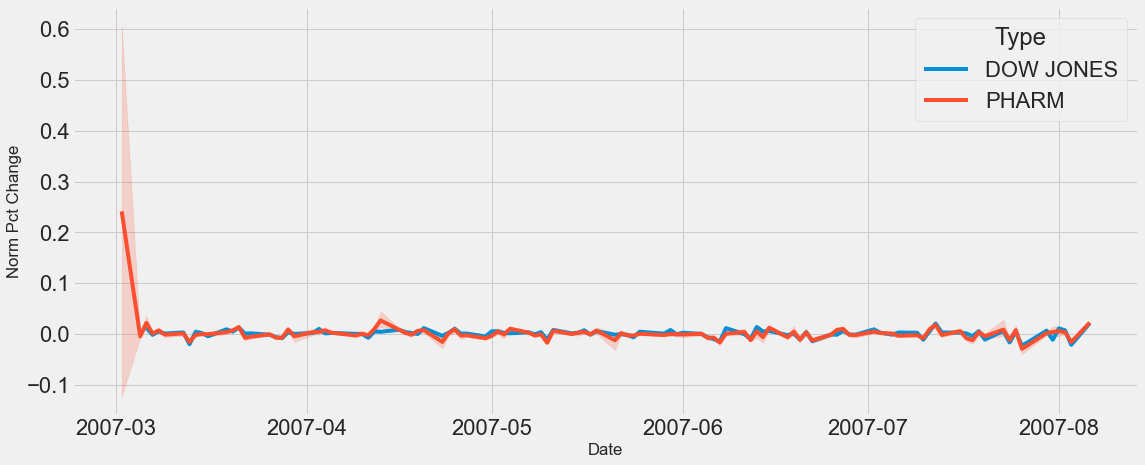

In [10]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices 2 years before h1n1
prevH1n1PharmStocks['Type'] = 'PHARM'
prevH1n1DJI['Type'] = 'DOW JONES'
frames = [prevH1n1DJI, prevH1n1PharmStocks]
prevStocks = pd.concat(frames)

sns.lineplot(data=prevStocks, x="Date", y="Norm Pct Change", hue='Type')


In [11]:
stocks = stocks.dropna()

In [12]:
# average % change of pharma stock prices during whole h1n1 pandemic vs average % change of stock prices during same time of year 2 years before pandemic
h1n1PharmaPctChangeAvg  = h1n1PharmStocks['Norm Pct Change'].abs().mean()
preH1n1PharmaPctChangeAvg  = prevH1n1PharmStocks['Norm Pct Change'].abs().mean()
print (h1n1PharmaPctChangeAvg, preH1n1PharmaPctChangeAvg)

0.018062652364428812 0.012628203071318287


In [13]:
# want to split pandemic to 1/3's and calculate avg percent change in stock prices during each period 
first = int(len(h1n1PharmStocks)/3)
second = 2*first
third = 3*first
h1n1SumOne = abs(h1n1PharmStocks[:first]['Norm Pct Change']).mean()
h1n1SumTwo = abs(h1n1PharmStocks[first:second]['Norm Pct Change']).mean()
h1n1SumThree = abs(h1n1PharmStocks[second:]['Norm Pct Change']).mean()
print(h1n1SumOne, h1n1SumTwo, h1n1SumThree)

0.016832292842324542 0.017645090164844758 0.019705006783003316


In [14]:
# compare to the same time period except 2 years prior that way we can quanitfy the change
first = int(len(prevH1n1PharmStocks)/3)
second = 2*first
third = 3*first
prevH1n1SumOne = abs(prevH1n1PharmStocks[:first]['Norm Pct Change']).mean()
prevH1n1SumTwo = abs(prevH1n1PharmStocks[first:second]['Norm Pct Change']).mean()
prevH1n1SumThree = abs(prevH1n1PharmStocks[second:]['Norm Pct Change']).mean()
print(prevH1n1SumOne, prevH1n1SumTwo, prevH1n1SumThree)

0.0139245395195063 0.012040783408370228 0.011919286286078338


## TALK ABOUT THIS STUFF FOR ANALYSIS
 - notice not much correlation with value of stock prices and cases 
 - we think maybe should focus more on duration of pandemic rather than cases
 - notice from graphs the prices seem very volatile during pandemic 
 - compare % change during pandemic and 1-2 years before  and if possible 1-2 years after
 - notice that the graphs are much more flat in the prior years so less volatile 
 - find avg % change so we can quantify the volatility 
 - notice pandemic periods are more volatile but want to examine closely which parts of pandemics causes this 
 - split graph into thirds and noticed that each period is more volatile than the corresponding prev year 
 - however we also notice it gets more volatile later on in the pandemics (could possibly attribute to maybe more cases)

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*